In [2]:
!pip3 install numpy
!pip3 install matplotlib

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/75/5b/ca6c8bd14007e5ca171c7c03102d17b4f4e0ceb53957e8c44343a9546dcc/numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 435.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 7.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.12 -m pip install --upgrade pip
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4c/88/15bbb864b0d871707294ff325f9ffd0dfa486db2637eb34dd5f8dcf5b9bf/matplotlib-3.9.0-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/51/03/36ecc6fd1d018336625ad91b91fd34cd9ba8da5d36f5e1167dfe3275070a/contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


/var/folders/60/kvk_xv6j1t34xnqqyt6bdhmm0000gn/T/ipykernel_14921/2621866582.py:6: RuntimeWarning: invalid value encountered in cast
  if point[0,2] == 0:
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/collections.py:197: RuntimeWarning: invalid value encountered in cast
  offsets = np.asanyarray(offsets, float)


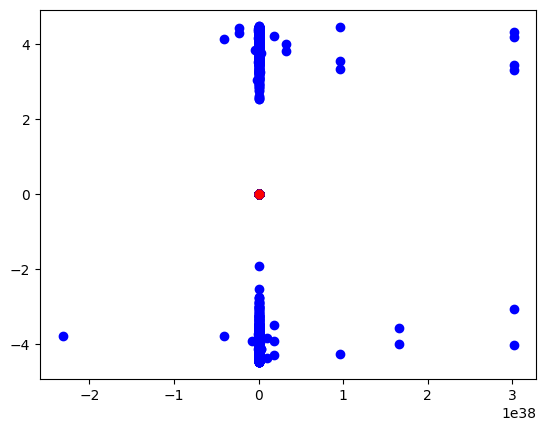

In [22]:
def load_data(file_path):
    return np.fromfile(file_path, dtype=np.float32).reshape(-1, 1, 3)

def visualize_data(data):
    for point in data:
        if point[0,2] == 0:
            plt.scatter(point[0,0], point[0,1], color='red')
        else:
            plt.scatter(point[0,0], point[0,1], color='blue')

data = load_data('RNA-2024.1-PP2.1-Dados/dataAll.txt')

In [37]:
print(data[:,0,0:2])
print("==============")
data[:,0,2]

[[ 8.5815462e+05 -3.8552620e+00]
 [ 3.7268403e+00  0.0000000e+00]
 [ 3.1782374e+37  3.8210518e+00]
 ...
 [-4.1861801e+00  0.0000000e+00]
 [ 2.0605468e-04 -3.5237246e+00]
 [ 4.2168927e+00  0.0000000e+00]]


array([-8.9062502e-05,  0.0000000e+00, -1.5283204e-05, ...,
        1.8750000e+00,  7.0148841e+10,  0.0000000e+00], dtype=float32)

In [42]:
class Perceptron():
    def __init__(self, learning_rate = .01, n_iterations = 1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.bias = None
        self.weights = None
        self.metrics = []
        
    def activation_function(self, net_input):
        # STEP ACTIVATION
        return np.where(net_input > 0, 1, 0)
    
    def fit(self, features, targets):
        n_examples, n_features = features.shape
        
        # change these to use different initialization scheme
        self.weights = np.random.uniform(size = n_features, low = -0.5, high = 0.5)
        self.bias = np.random.uniform(low = -0.5, high = 0.5)
        
        for _ in range(self.n_iterations):
            errors = 0
            for example_index, example_features in enumerate(features):
                net_input = np.dot(example_features, self.weights) + self.bias
                y_predicted = self.activation_function(net_input)
                error = targets[example_index] - y_predicted
                if error != 0:
                    errors += 1
                self._update_weights(example_features, targets[example_index], y_predicted)
            self.metrics.append(errors)
            print(f'Epoch: {_+1}, Errors: {errors}')
        
    def _update_weights(self, example_features, y_actual, y_predicted):
        error = y_actual - y_predicted
        weight_correction = self.learning_rate * error
        self.weights = self.weights + weight_correction * example_features
        self.bias = self.bias + weight_correction
        
    def predict(self, features):
        net_input = np.dot(features, self.weights) + self.bias
        y_predicted = self.activation_function(net_input)
        return y_predicted

In [43]:
X = data[:,0,0:2]
y = data[:,0,2]



/var/folders/60/kvk_xv6j1t34xnqqyt6bdhmm0000gn/T/ipykernel_14921/3813748562.py:35: RuntimeWarning: overflow encountered in multiply
  self.weights = self.weights + weight_correction * example_features
/var/folders/60/kvk_xv6j1t34xnqqyt6bdhmm0000gn/T/ipykernel_14921/3813748562.py:25: RuntimeWarning: invalid value encountered in cast
  error = targets[example_index] - y_predicted
/var/folders/60/kvk_xv6j1t34xnqqyt6bdhmm0000gn/T/ipykernel_14921/3813748562.py:33: RuntimeWarning: invalid value encountered in cast
  error = y_actual - y_predicted
/var/folders/60/kvk_xv6j1t34xnqqyt6bdhmm0000gn/T/ipykernel_14921/3813748562.py:23: RuntimeWarning: invalid value encountered in cast
  net_input = np.dot(example_features, self.weights) + self.bias
/var/folders/60/kvk_xv6j1t34xnqqyt6bdhmm0000gn/T/ipykernel_14921/3813748562.py:35: RuntimeWarning: invalid value encountered in multiply
  self.weights = self.weights + weight_correction * example_features


Epoch: 1, Errors: 1524
Epoch: 2, Errors: 1524
Epoch: 3, Errors: 1524
Epoch: 4, Errors: 1524
Epoch: 5, Errors: 1524
Epoch: 6, Errors: 1524
Epoch: 7, Errors: 1524
Epoch: 8, Errors: 1524
Epoch: 9, Errors: 1524
Epoch: 10, Errors: 1524
Epoch: 11, Errors: 1524
Epoch: 12, Errors: 1524
Epoch: 13, Errors: 1524
Epoch: 14, Errors: 1524
Epoch: 15, Errors: 1524
Epoch: 16, Errors: 1524
Epoch: 17, Errors: 1524
Epoch: 18, Errors: 1524
Epoch: 19, Errors: 1524
Epoch: 20, Errors: 1524
Epoch: 21, Errors: 1524
Epoch: 22, Errors: 1524
Epoch: 23, Errors: 1524
Epoch: 24, Errors: 1524
Epoch: 25, Errors: 1524
Epoch: 26, Errors: 1524
Epoch: 27, Errors: 1524
Epoch: 28, Errors: 1524
Epoch: 29, Errors: 1524
Epoch: 30, Errors: 1524
Epoch: 31, Errors: 1524
Epoch: 32, Errors: 1524
Epoch: 33, Errors: 1524
Epoch: 34, Errors: 1524
Epoch: 35, Errors: 1524
Epoch: 36, Errors: 1524
Epoch: 37, Errors: 1524
Epoch: 38, Errors: 1524
Epoch: 39, Errors: 1524
Epoch: 40, Errors: 1524
Epoch: 41, Errors: 1524
Epoch: 42, Errors: 1524
E

KeyboardInterrupt: 